In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

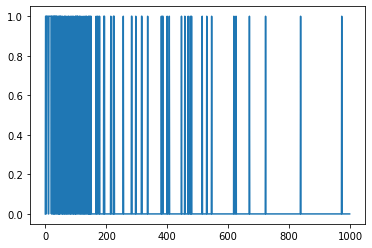

In [ ]:
plt.plot(train_data[0])

In [ ]:
train_data[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

#과대적합 예제
과대적합을 막는 가장 간단한 방법 = 파라미터 수 감소

파라미터 수가 많음 > 기존 데이터에는 완벽한 학습 > 신규 데이터에 대한 대응력 감소

딥러닝에서 가장 중요한 것은 학습이 아니라 "일반화"

마법같은 공식은 없기에 많이 시도해야 한다.

In [ ]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=1
)

Epoch 1/20
49/49 [==============================] - 0s 10ms/step - loss: 0.6048 - accuracy: 0.6804 - binary_crossentropy: 0.6048 - val_loss: 0.4635 - val_accuracy: 0.8124 - val_binary_crossentropy: 0.4635
Epoch 2/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.8409 - binary_crossentropy: 0.3826 - val_loss: 0.3453 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.3453
Epoch 3/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3257 - accuracy: 0.8627 - binary_crossentropy: 0.3257 - val_loss: 0.3304 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3304
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8734 - binary_crossentropy: 0.3092 - val_loss: 0.3300 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3300
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.8750 - binary_crossentropy: 0.3030 - val_loss: 0.3292 - val_accuracy: 0.8593 - val_binary_

#작은 모델 만들기
앞서 만든 모델에 비해 작은 모델을 만들겠습니다.

In [ ]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=1
)

Epoch 1/20
49/49 [==============================] - 0s 9ms/step - loss: 0.6608 - accuracy: 0.6113 - binary_crossentropy: 0.6608 - val_loss: 0.6118 - val_accuracy: 0.7030 - val_binary_crossentropy: 0.6118
Epoch 2/20
49/49 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.7736 - binary_crossentropy: 0.5392 - val_loss: 0.4819 - val_accuracy: 0.8165 - val_binary_crossentropy: 0.4819
Epoch 3/20
49/49 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8394 - binary_crossentropy: 0.4212 - val_loss: 0.3901 - val_accuracy: 0.8455 - val_binary_crossentropy: 0.3901
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.8617 - binary_crossentropy: 0.3552 - val_loss: 0.3530 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3530
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3264 - accuracy: 0.8692 - binary_crossentropy: 0.3264 - val_loss: 0.3389 - val_accuracy: 0.8592 - val_binary_c

In [ ]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'],
)

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Epoch 1/20
49/49 - 3s - loss: 0.4074 - accuracy: 0.8138 - binary_crossentropy: 0.4074 - val_loss: 0.3301 - val_accuracy: 0.8579 - val_binary_crossentropy: 0.3301
Epoch 2/20
49/49 - 3s - loss: 0.2893 - accuracy: 0.8800 - binary_crossentropy: 0.2893 - val_loss: 0.3346 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3346
Epoch 3/20
49/49 - 2s - loss: 0.2266 - accuracy: 0.9108 - binary_crossentropy: 0.2266 - val_loss: 0.3352 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3352
Epoch 4/20
49/49 - 3s - loss: 0.1075 - accuracy: 0.9658 - binary_crossentropy: 0.1075 - val_loss: 0.4177 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.4177
Epoch 5/20
49/49 - 3s - loss: 0.0247 - accuracy: 0.9959 - binary_crossentropy: 0.0247 - val_loss: 0.5430 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.5430
Epoch 6/20
49/49 - 2s - loss: 0.0055 - accuracy: 0.9998 - binary_crossentropy: 0.0055 - val_loss: 0.6189 - val_accuracy: 0.8494 - val_binary_crossentropy: 0.6189
Epoch 7/20
49/49 - 3s - loss

In [ ]:
dir(baseline_history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
baseline_history.history.keys()

dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy'])

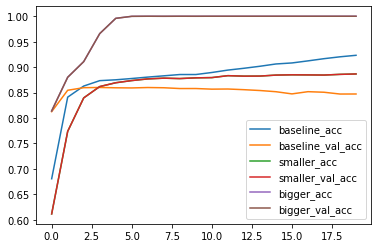

In [ ]:
plt.figure()
plt.plot(baseline_history.epoch, baseline_history.history['accuracy'], label='baseline_acc')
plt.plot(baseline_history.epoch, baseline_history.history['val_accuracy'], label='baseline_val_acc')
plt.plot(smaller_history.epoch, smaller_history.history['accuracy'], label='smaller_acc')
plt.plot(smaller_history.epoch, smaller_history.history['accuracy'], label='smaller_val_acc')
plt.plot(bigger_history.epoch, bigger_history.history['accuracy'], label='bigger_acc')
plt.plot(bigger_history.epoch, bigger_history.history['accuracy'], label='bigger_val_acc')
plt.legend()


In [ ]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

l2_history = l2_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=1
)

Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6323 - accuracy: 0.6991 - binary_crossentropy: 0.5893 - val_loss: 0.4863 - val_accuracy: 0.8188 - val_binary_crossentropy: 0.4458
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.4170 - accuracy: 0.8464 - binary_crossentropy: 0.3769 - val_loss: 0.3864 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.3469
Epoch 3/20
49/49 [==============================] - 0s 5ms/step - loss: 0.3632 - accuracy: 0.8661 - binary_crossentropy: 0.3247 - val_loss: 0.3703 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3328
Epoch 4/20
49/49 [==============================] - 0s 6ms/step - loss: 0.3490 - accuracy: 0.8700 - binary_crossentropy: 0.3123 - val_loss: 0.3647 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3289
Epoch 5/20
49/49 [==============================] - 0s 6ms/step - loss: 0.3425 - accuracy: 0.8724 - binary_crossentropy: 0.3075 - val_loss: 0.3645 - val_accuracy: 0.8599 - val_binary_

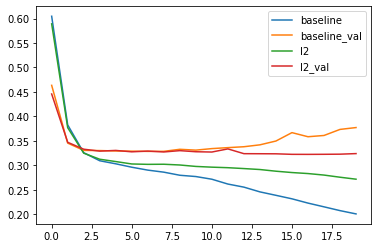

In [ ]:
plt.figure()
plt.plot(baseline_history.epoch, baseline_history.history['binary_crossentropy'], label='baseline')
plt.plot(baseline_history.epoch, baseline_history.history['val_binary_crossentropy'], label='baseline_val')
plt.plot(l2_history.epoch, l2_history.history['binary_crossentropy'], label='l2')
plt.plot(l2_history.epoch, l2_history.history['val_binary_crossentropy'], label='l2_val')
plt.legend()


In [ ]:
drop_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

drop_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

drop_history = drop_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=1
)

Epoch 1/20
49/49 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.5688 - binary_crossentropy: 0.6760 - val_loss: 0.6093 - val_accuracy: 0.7583 - val_binary_crossentropy: 0.6093
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.5815 - accuracy: 0.6963 - binary_crossentropy: 0.5815 - val_loss: 0.4643 - val_accuracy: 0.8306 - val_binary_crossentropy: 0.4643
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.7777 - binary_crossentropy: 0.4833 - val_loss: 0.3799 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.3799
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.4297 - accuracy: 0.8148 - binary_crossentropy: 0.4297 - val_loss: 0.3482 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3482
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.4010 - accuracy: 0.8291 - binary_crossentropy: 0.4010 - val_loss: 0.3342 - val_accuracy: 0.8576 - val_binary_

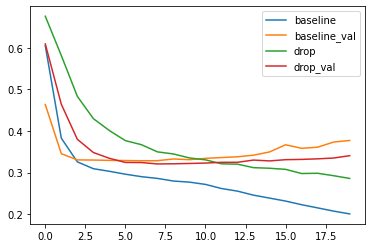

In [ ]:
plt.figure()
plt.plot(baseline_history.epoch, baseline_history.history['binary_crossentropy'], label='baseline')
plt.plot(baseline_history.epoch, baseline_history.history['val_binary_crossentropy'], label='baseline_val')
plt.plot(drop_history.epoch, drop_history.history['binary_crossentropy'], label='drop')
plt.plot(drop_history.epoch, drop_history.history['val_binary_crossentropy'], label='drop_val')
plt.legend()
